In [17]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats

#libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#model building libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

#libraries for model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

#library for ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# About dataset

In [3]:
#loading and reading the dataset
df = pd.read_csv("/content/Advertising.csv", index_col = 0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
#checking the number of rows and number of columns in the dataset
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  200
Number of columns:  4


In [5]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
#checking for any duplicate values
dup = df.duplicated().sum()
print('Number of duplicated rows:',dup)

Number of duplicated rows: 0


In [7]:
#checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

📊INSIGHTS:

The dataset consists of the budget allocated for TV, radio and newspaper advertisements with the resulting sales. It consists of 200 rows with no missing values and no duplicate values.

# Univariate analysis

In [8]:
#dataset description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
#calculating skewness and kurtosis
variables=df.iloc[:,:-1]
num_col_list = variables.columns.tolist()
for i in num_col_list:
  print("Skewness of ",i,"is",stats.skew(df[i]))
  print("Kurtosis of ",i,"is",stats.kurtosis(df[i]))
  print("\n")

Skewness of  TV is -0.06932836662244649
Kurtosis of  TV is -1.2258970752747362


Skewness of  Radio is 0.0934668451108453
Kurtosis of  Radio is -1.2589619024872696


Skewness of  Newspaper is 0.8879959753085498
Kurtosis of  Newspaper is 0.603526874867891




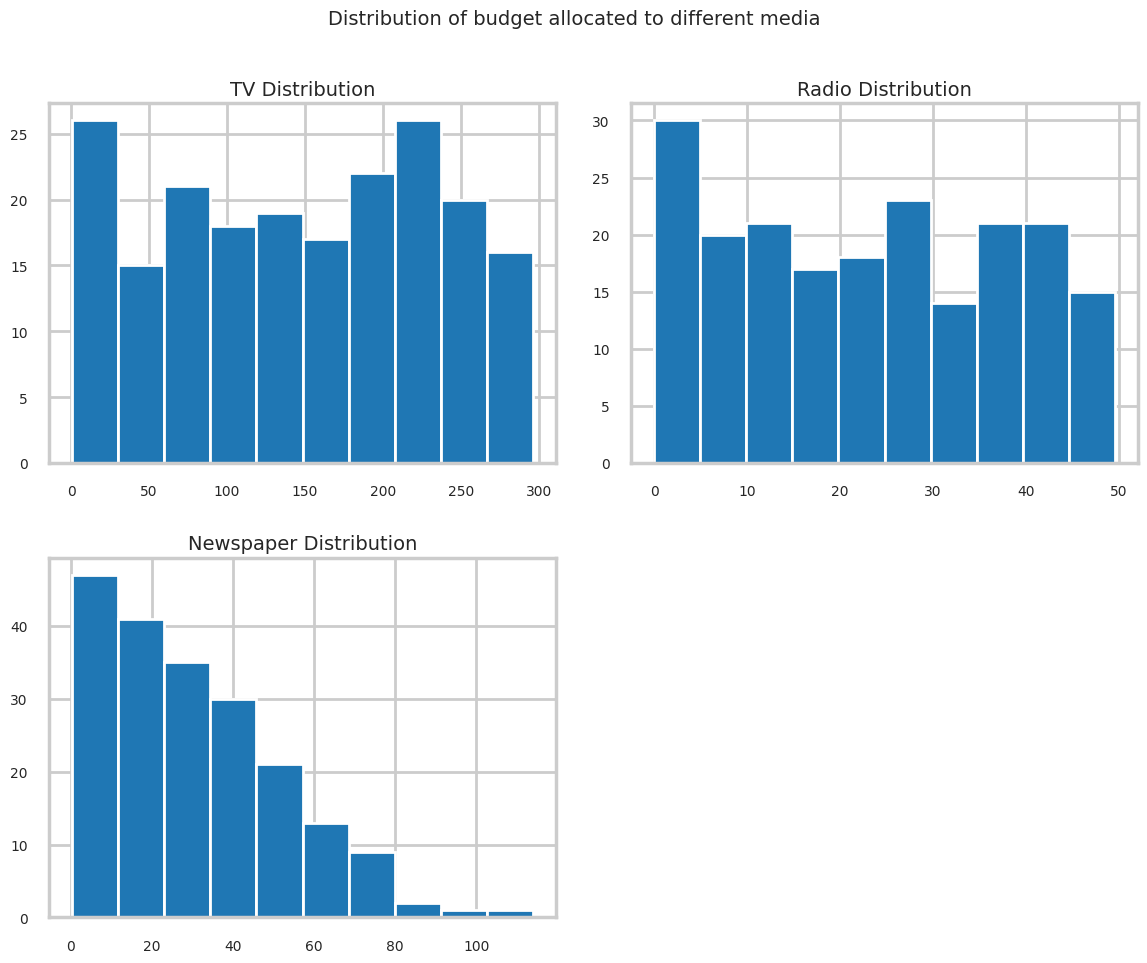

In [18]:
# Chart - 1 Histogram
# Create a figure with subplots
plt.figure(figsize=(12, 10))
plt.suptitle('Distribution of budget allocated to different media', fontsize=14)

# Subplot 1 (Top-Left)
plt.subplot(2, 2, 1)
plt.hist(df['TV'],bins=10)
plt.title('TV Distribution', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)

# Subplot 2 (Top-Right)
plt.subplot(2, 2, 2)
plt.hist(df['Radio'],bins=10)
plt.title('Radio Distribution', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)

# Subplot 3 (Bottom-Left)
plt.subplot(2, 2, 3)
plt.hist(df['Newspaper'],bins=10)
plt.title('Newspaper Distribution', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)

# Display the subplots
plt.tight_layout()
plt.show()


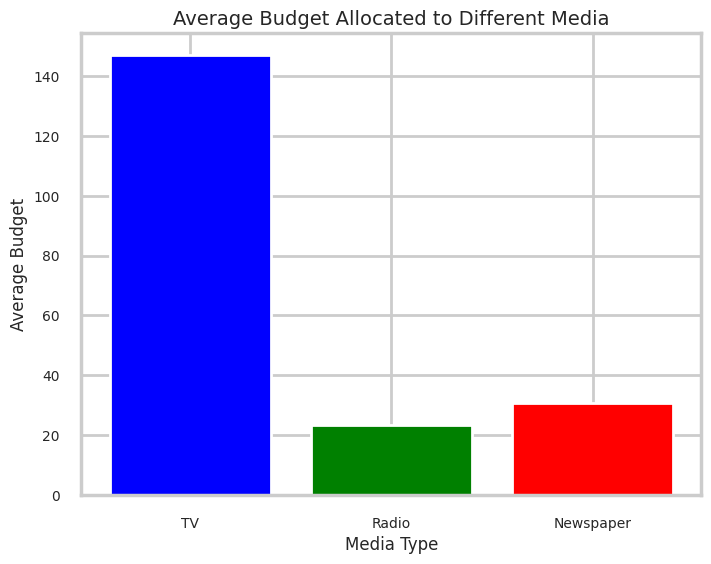

In [19]:
# Chart - 2 Barplot
# Calculate the average budget for each medium
average_budgets = variables.mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(average_budgets.index, average_budgets.values, color=['blue', 'green', 'red'])
plt.title('Average Budget Allocated to Different Media', fontsize=14)
plt.xlabel('Media Type', fontsize=12)
plt.ylabel('Average Budget', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)

# Display the bar chart
plt.show()


**📊INSIGHTS:**

1. **TV Distribution**:
   - The TV shows a bimodal distribution with peaks around 0-10 and 210-240.
   - It also has the most average buget allocated among the three.

2. **Radio Distribution**:
   - The Radio has a peak around 0-5 and has a more evenly spread out distribution.
   - This indicates that low budgets are more common for the Radio

3. **Newspaper Distribution**:
   - The Newspaer has a peak around 0-12 and has a decreasing distribution.
   - This indicates that low budgets are most common for Newspaper.

# Bivariate analysis

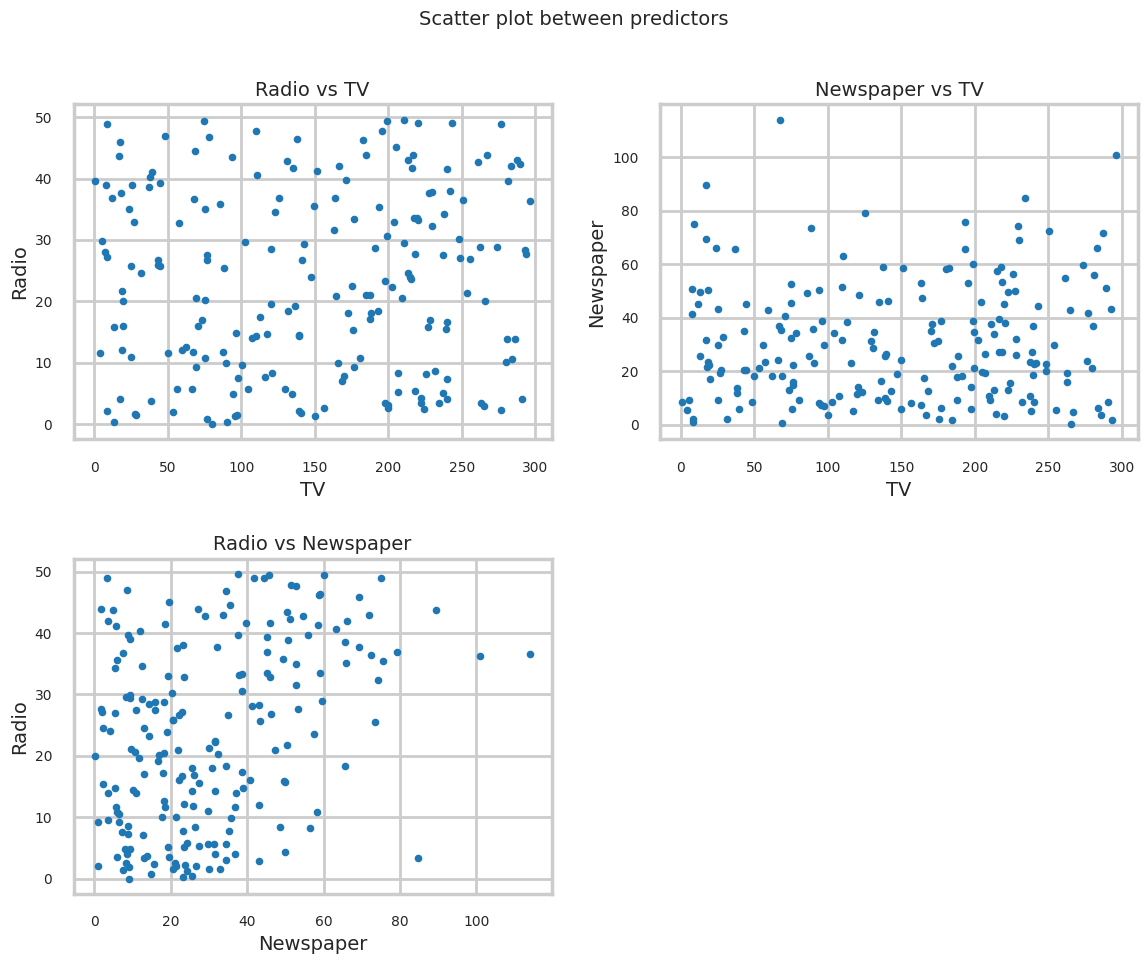

In [23]:
# Create a figure with subplots
plt.figure(figsize=(12, 10))
plt.suptitle('Scatter plot between predictors', fontsize=14)

# Subplot 1 (Top-Left)
plt.subplot(2, 2, 1)
plt.scatter(df["TV"], df["Radio"], s=12)
plt.xlabel("TV", fontsize=14)
plt.ylabel("Radio", fontsize=14)
plt.title("Radio vs TV", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)

# Subplot 2 (Top-Right)
plt.subplot(2, 2, 2)
plt.scatter(df["TV"], df["Newspaper"], s=12)
plt.xlabel("TV", fontsize=14)
plt.ylabel("Newspaper", fontsize=14)
plt.title("Newspaper vs TV", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)

# Subplot 3 (Bottom-Left)
plt.subplot(2, 2, 3)
plt.scatter(df["Newspaper"], df["Radio"], s=12)
plt.xlabel("Newspaper", fontsize=14)
plt.ylabel("Radio", fontsize=14)
plt.title("Radio vs Newspaper", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)

# Display the subplots
plt.tight_layout()
plt.show()


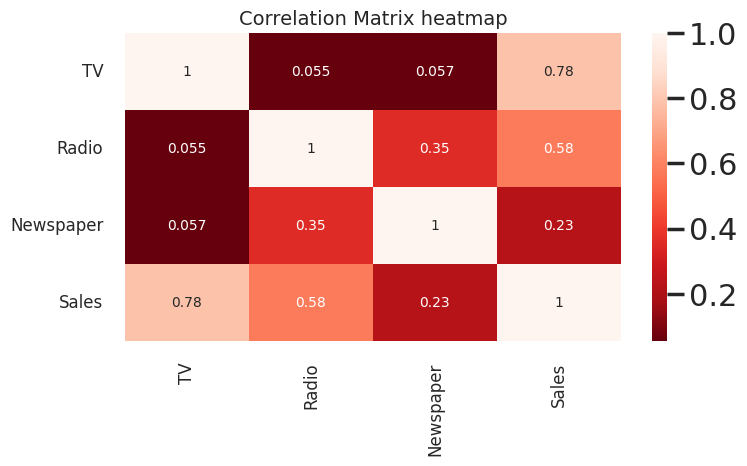

In [30]:
# Correlation Heatmap
corr_matrix = df.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r', annot_kws={"size": 10})
plt.tick_params(axis='both', which='major', labelsize=12)

# Setting Labels
plt.title('Correlation Matrix heatmap', fontsize=14)

# Display Chart
plt.show()

**📊INSIGHTS:**
The prectors between them has a lower correlation. It is clear from the heat map that TV has the highest correlation with sales. This indicates that TV plays a more significant role in the sales prediction.

#Data preprocessing

In [74]:
# Defining the x and y
x=df.drop(columns=['Sales'], axis=1)
y=df['Sales']

In [75]:
# Splitting the data to train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)

In [76]:
# Initialize dataframe that will store the results
df_results = pd.DataFrame(columns = ["Predictor(s)", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

#Model building

In [77]:
#Model 1- Linear Regression
def linreg_model(xtrain, xtest):
    # Initialize algorithm
    linreg = LinearRegression()

    # Fit the data
    linreg.fit(xtrain, y_train)

    # Evaluate the model
    y_pred = linreg.predict(xtest)

    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

    f, ax = plt.subplots(figsize=(9, 7))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")

    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test),
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

R2: 0.8467730707328176
MAE: 1.5116692224549086
MSE: 3.79679723671522
RMSE: 1.9485372043446387

Cross-Val Results: [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]

Cross-Val Mean: 0.8853562237979616
  Predictor(s)         R2       MAE       MSE      RMSE  Cross-Val Mean
0          All  84.677307  1.511669  3.796797  1.948537       88.535622


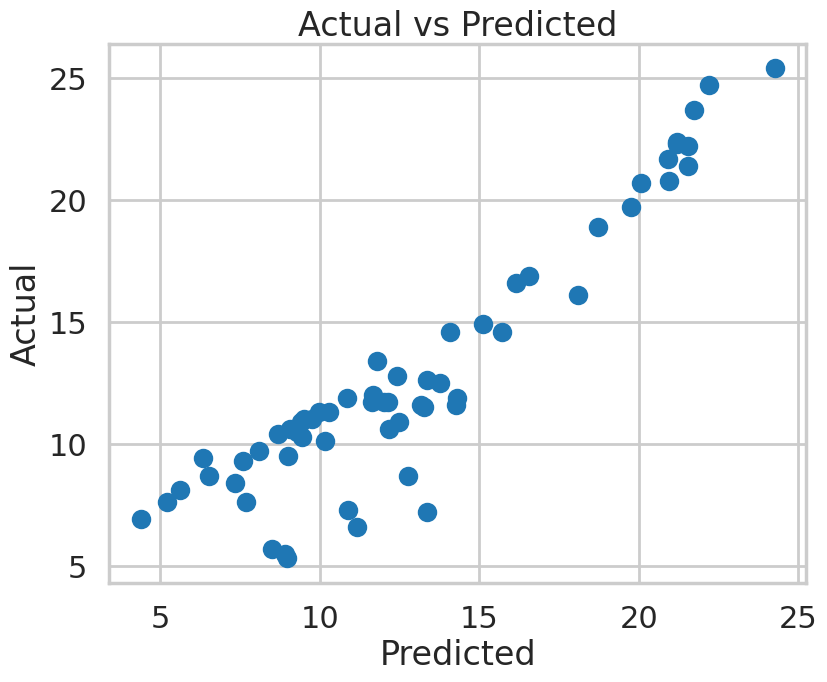

In [78]:
#Using all predictors
# Predict and get results
linreg_all_results = linreg_model(x_train, x_test)

# Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("\nCross-Val Results:", cv_score)
print("\nCross-Val Mean:", cv_score.mean())

# Compile validation results
linreg_all_results.update({"Predictor(s)": "All", "Cross-Val Mean": cv_score.mean() * 100})

# Create a dataframe if it doesn't exist
if 'df_results' not in locals():
    df_results = pd.DataFrame()

# Convert the results dictionary to a DataFrame and concatenate
results_df = pd.DataFrame([linreg_all_results])
df_results = pd.concat([df_results, results_df], ignore_index=True)

# Print the updated dataframe to check
print(df_results)

R2: 0.44163758691499244
MAE: 2.2758809050205113
MSE: 8.970991242413614
RMSE: 2.9951613049072354

Cross-Val Results: [0.70015158 0.43449405 0.58322591 0.78975123 0.47952235 0.62298657
 0.66525353 0.60389703 0.16530872 0.64237498]

Cross-Val Mean: 0.5686965937483904
  Predictor(s)         R2       MAE       MSE      RMSE  Cross-Val Mean
0          All  84.677307  1.511669  3.796797  1.948537       88.535622
1           TV  44.163759  2.275881  8.970991  2.995161       56.869659


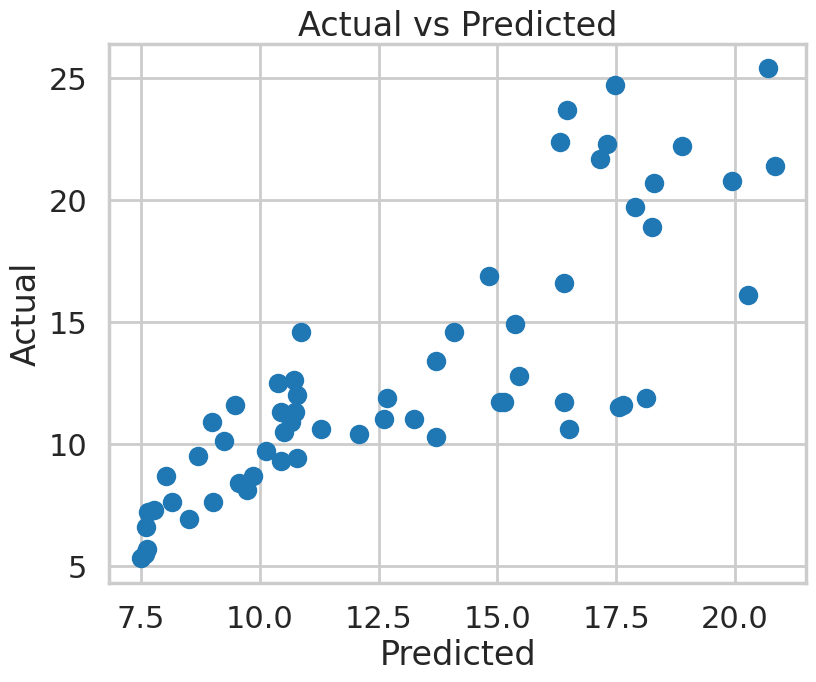

In [79]:
#Using only TV as predictor
# Predict and get results
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

# Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("\nCross-Val Results:", cv_score)
print("\nCross-Val Mean:", cv_score.mean())

# Compile validation results
linreg_TV_results.update({"Predictor(s)": "TV", "Cross-Val Mean": cv_score.mean() * 100})

# Create a dataframe if it doesn't exist
if 'df_results' not in locals():
    df_results = pd.DataFrame()

# Convert the results dictionary to a DataFrame and concatenate
results_df = pd.DataFrame([linreg_TV_results])
df_results = pd.concat([df_results, results_df], ignore_index=True)

# Print the updated dataframe to check
print(df_results)

R2: 0.850619536191285
MAE: 1.4758950903812142
MSE: 3.669047054530681
RMSE: 1.9154756731764255

Cross-Val Results: [0.87936561 0.85860496 0.92960574 0.89040105 0.93302554 0.93129743
 0.76486772 0.91373255 0.83925519 0.92951475]

Cross-Val Mean: 0.8869670516810129
   Predictor(s)         R2       MAE       MSE      RMSE  Cross-Val Mean
0           All  84.677307  1.511669  3.796797  1.948537       88.535622
1            TV  44.163759  2.275881  8.970991  2.995161       56.869659
2  TV and Radio  85.061954  1.475895  3.669047  1.915476       88.696705


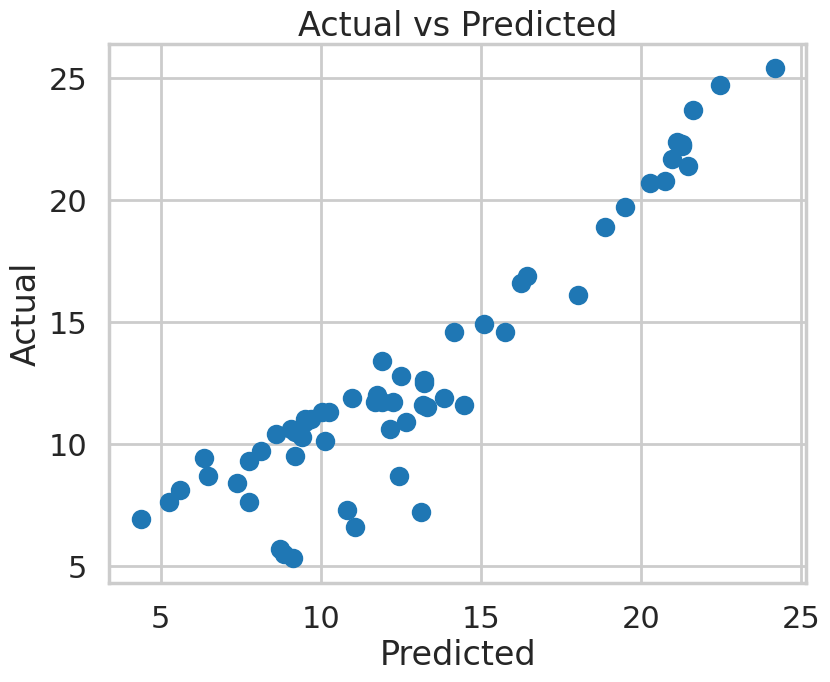

In [80]:
#Using TV and Radio
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

# Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "Radio"]], y, cv=10)

print("\nCross-Val Results:", cv_score)
print("\nCross-Val Mean:", cv_score.mean())

# Compile validation results
linreg_TVR_results.update({"Predictor(s)": "TV and Radio", "Cross-Val Mean": cv_score.mean() * 100})

# Create a dataframe if it doesn't exist
if 'df_results' not in locals():
    df_results = pd.DataFrame()

# Convert the results dictionary to a DataFrame and concatenate
results_df = pd.DataFrame([linreg_TVR_results])
df_results = pd.concat([df_results, results_df], ignore_index=True)

# Print the updated dataframe to check
print(df_results)

In [81]:
df_results.set_index("Predictor(s)", inplace = True)
df_results.head()

,R2,MAE,MSE,RMSE,Cross-Val Mean
Predictor(s),,,,,
All,84.677307,1.511669,3.796797,1.948537,88.535622
TV,44.163759,2.275881,8.970991,2.995161,56.869659
TV and Radio,85.061954,1.475895,3.669047,1.915476,88.696705


**📊INSIGHTS:**

The Linear Regression model that uses the predictors TV and Radio performs the best out of all the models tried.

These results mean that advertising on TV and Radio contribute the most in Sales, and Newspaper advertisements have little effect in Sales.

Based on these findings, it is recommended that the marketer or the business owner shall allocate more budget on TV and Radio advertisements rather than Newspaper.